In [363]:
# Import necessary libraries
import numpy as np
import scipy.sparse as sp
import scipy.stats as ss
import math
import fractions
import networkx as nx
import matplotlib.pyplot as plt

num_edge_features = 5
num_node_features = 3
connect_prob = 0.1

In [364]:
# Lists of ISO standard modules and tooth numbers

modules = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1, 1.25, 1.5, 2, 2.5, 3, 4, 5, 6, 8, 10, 12, 16, 20, 25, 32, 40, 50,
           0.15, 0.25, 0.35, 0.45, 0.55, 0.7, 0.75, 0.9, 1.75, 2.25, 2.75, 3.5, 4.5, 5.5, 7, 9, 11, 14, 18, 22, 28, 36, 45,
           0.65, 3.25, 3.75, 6.5]
teeth = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 
         41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
         70, 72, 75, 76, 80, 85, 90, 95, 100, 110, 114, 120, 127]

possible_ratios = {}

In [365]:
for i in range(len(teeth)):
    for j in range(len(teeth)):
        ratio = fractions.Fraction(teeth[i],teeth[j])
        if ratio in possible_ratios:
            possible_ratios[ratio].append([teeth[i],teeth[j]])
        else:
            possible_ratios[ratio] = []
            possible_ratios[ratio].append([teeth[i],teeth[j]])
            
        ratio = fractions.Fraction(teeth[j],teeth[i])
        if ratio in possible_ratios:
            possible_ratios[ratio].append([teeth[j],teeth[i]])
        else:
            possible_ratios[ratio] = []
            possible_ratios[ratio].append([teeth[j],teeth[i]])
            
for k in possible_ratios.keys():
    possible_ratios[k] = np.unique(np.array(possible_ratios[k]),axis=0)

In [366]:
# Import necessary libraries
import numpy as np
import scipy.sparse as sp
import scipy.stats as ss
import math as math

ef = 5
nf = 3
connect_prob = 0.1

# Lists of ISO standard modules and tooth numbers

modules = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1, 1.25, 1.5, 2, 2.5, 3, 4, 5, 6, 8, 10, 12, 16, 20, 25, 32, 40, 50,
           0.15, 0.25, 0.35, 0.45, 0.55, 0.7, 0.75, 0.9, 1.75, 2.25, 2.75, 3.5, 4.5, 5.5, 7, 9, 11, 14, 18, 22, 28, 36, 45,
           0.65, 3.25, 3.75, 6.5]
teeth = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 
         41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
         70, 72, 75, 76, 80, 85, 90, 95, 100, 110, 114, 120, 127]

# Choose int in a range from a normal distribution
def normRange(low, high):
    x = np.arange(low, high+1)
    xU, xL = x + 0.5, x - 0.5 
    prob = ss.norm.cdf(xU, loc = ((low+high)/2), scale = ((high-low)/5)) - ss.norm.cdf(xL, loc = ((low+high)/2), scale = ((high-low)/6))
    prob = prob / prob.sum() # normalize the probabilities so their sum is 1
    
    return np.random.choice(x, p = prob)

In [367]:
def check_redundant(A,i):
    v_ne = list(np.where(A[i,:,0])[0])
    v_ne = list(set(v_ne))
    
    n_ne = len(v_ne)
    
    while True:
        if 0 in v_ne and A.shape[0]-1 in v_ne:
            return False
        else:
            v_ne += list(np.where(A[v_ne,:,0])[1])
            v_ne = list(set(v_ne))
            
        if len(v_ne) == n_ne:
            return True
        else:
            n_ne = len(v_ne)

In [368]:
def get_paths(A, u, n, visited, path, npaths):
    # Mark the current node as visited and store in path
    visited[u] = True
    path.append(u)
    # If current vertex is same as destination, then print
    # current path[]
    if u == n - 1:
#         print(path)
        npaths.append(list(path))
    else:
        # If current vertex is not destination
        # Recur for all the vertices adjacent to this vertex
        for i in list(np.where(A[u,:,0])[0]):
            if visited[i] == False:
                get_paths(A, i, n, visited, path, npaths)
    # Remove current vertex from path[] and mark it as unvisited
    path.pop()
    visited[u]= False
    
def all_paths(A):
    n = A.shape[0]
    visited = [False]*(n)
    path = []
    npaths = []
    grs = []
    grlist = []
    get_paths(A, 0, n, visited, path, npaths)
    
    return npaths

def non_redundant_shafts(A):
    paths = all_paths(A)
    non_redundant_shafts = np.unique(np.concatenate(paths))
    return non_redundant_shafts


In [369]:
def check_locking(A):
    visited = [False]*(A.shape[0])
    path = []
    npaths = []
    grs = []
    grlist = []
    get_paths(A, 0, A.shape[0], visited, path, npaths)
    for i in npaths:
        grt = 1
        for j in range(len(i)):
            gr = 0
            if j < len(i)-1:
                gr = (A[i[j], i[j+1], 3])/(A[i[j], i[j+1], 2])
                grt *= gr
                print(A[i[j], i[j+1], 3], A[i[j], i[j+1], 2])
                grlist.append([])
                grlist[j].append(gr)
        grs.append(grt)
        print("gear ratios list", grlist)
        print("total gear ratios", grs)
    return npaths

In [370]:
def calculate_omega(A):
    Omega = [-1]*A.shape[0]
    Omega[0] = fractions.Fraction(1,1)
    
    active_list = [0]
    visited_list = []
    while True:
        new_active_list = []
        for i in active_list:
            new_active_list += list(np.where(A[i,:,0])[0])
            for j in np.where(A[i,:,0])[0]:
                omega = -Omega[i] * fractions.Fraction(int(A[i,j,2]),int(A[i,j,3]))
                if Omega[j] == -1:
                    Omega[j] = omega
        visited_list += active_list
        active_list = np.array(list(set(new_active_list)))
        active_list = list(active_list[np.logical_not(np.isin(active_list,visited_list))])
        
        if len(active_list) == 0:
            break

    for i in range(A.shape[0]):
        for j in np.where(A[i,:,0])[0]:
            omega = -Omega[i] * fractions.Fraction(int(A[i,j,2]),int(A[i,j,3]))
            
            if Omega[j] != omega:
                # print("Locking at %i,%i. Omega1 %i Omega2 %i "%(i,j,Omega[j],omega))
                return False
        
    return True

In [371]:
def generate_random_gear_box(n=None, Max_N = 2, Min_N = 2, C_prob = 0.1):
    if n is None:
        n = np.random.randint(low=Min_N,high=Max_N+1)

    # Instantiate adjacency matrix  
    A = np.zeros((n, n, 6))
    Omega = [-1]*n
    
    Omega[0] = fractions.Fraction(1,1)
    
    # Loop through the edges in the graph and assign their features
    for i in range(n):
        connected = False
        while not connected:
            connected = A[i,:,0].sum()>0
            for j in range(n):
                if (i != j) and (np.random.uniform() <= connect_prob) and not (i==0 and j==n-1) and not (j==0 and i==n-1):

                    if Omega[i] != -1 and Omega[j] != -1:
                        current_ratio = Omega[j]/Omega[i]
                        if current_ratio in possible_ratios and current_ratio<0:
                            teeth_pair = possible_ratios[current_ratio][np.random.choice(possible_ratios[current_ratio].shape[0])]
                            m = np.random.choice(modules)
                            t1 = teeth_pair[1] # tooth of gear 1
                            t2 = teeth_pair[0] # tooth of gear 2
                            alpha = math.pi/9 # pressure angle in radians
                            fw = (m*(t1+t2))/2 # face width in mm
                            A[i,j,0] = 1
                            A[i,j,1] = m
                            A[i,j,2] = t2
                            A[i,j,3] = t1
                            A[i,j,4] = alpha
                            A[i,j,5] = fw
                            A[j,i,:] = A[i,j,:]
                            A[j,i,2] = t1
                            A[j,i,3] = t2
                            connected = True
                    elif Omega[i] != -1 or Omega[j] != -1:
                        
                        rand_ratio = list(possible_ratios.keys())[np.random.choice(len(list(possible_ratios.keys())))]
                        m = np.random.choice(modules) # module in mm

                        teeth_pair = possible_ratios[rand_ratio][np.random.choice(possible_ratios[rand_ratio].shape[0])]

                        t1 = teeth_pair[1] # tooth of gear 1
                        t2 = teeth_pair[0] # tooth of gear 2
                        alpha = math.pi/9 # pressure angle in radians
                        fw = (m*(t1+t2))/2 # face width in mm
                        
                        if Omega[i] == -1:
                            Omega[i] = -Omega[j]/rand_ratio
                        else:
                            Omega[j] = -Omega[i]*rand_ratio
                        
                        A[i,j,0] = 1
                        A[i,j,1] = m
                        A[i,j,2] = t2
                        A[i,j,3] = t1
                        A[i,j,4] = alpha
                        A[i,j,5] = fw
                        A[j,i,:] = A[i,j,:]
                        A[j,i,2] = t1
                        A[j,i,3] = t2
                        connected = True
                    
    
#     # Instantiate an empty node feature matrix with the desired shape
#     N = np.zeros((n, nf))
#     # Loop through the nodes in the graph and assign their features
#     x0 = 0
#     y0 = 0
#     for i in range(n):
#         # Set origin to input shaft
#         if i == 0:
#             x = 0
#             y = 0
#             theta = 0
#         else:
#             #loop until there's a connection, and get relative position
#             for j in range(n):
#                 if A[i-1,j-1,0] == 1:
#                     ctc = A[i,j,1]*(A[i,j,2]+A[i,j,3]) # center to center distance = m*(t1+t2)
#                     theta = np.random.uniform(2*math.pi)
#                     x = x0 + ctc * math.sin(theta)
#                     y = y0 + ctc * math.cos(theta)
#         x0 = x
#         y0 = y

            
    non_redundant = non_redundant_shafts(A)
    A = A[non_redundant,:,:][:,non_redundant,:]
    
#     print(check_locking(A,n))
    #if check_locking(A,n):
    #    return generate_random_gear_box(n, Max_N, Min_N, C_prob)

    
    return A

In [372]:
def generate_random_gear_box_simple(n=None, Max_N = 2, Min_N = 2, C_prob = 0.1):
    if n is None:
        n = np.random.randint(low=Min_N,high=Max_N+1)

    # Instantiate adjacency matrix  
    A = np.zeros((n, n, 6))
    Omega = [-1]*n
    
    Omega[0] = fractions.Fraction(1,1)
    
    # Loop through the edges in the graph and assign their features
    for i in range(n):
        connected = False
        while not connected:
            connected = A[i,:,0].sum()>0
            for j in range(n):
                if (i != j) and (np.random.uniform() <= connect_prob) and not (i==0 and j==n-1) and not (j==0 and i==n-1):

                    m = np.random.choice(modules) # module in mm

                    t1 = np.random.choice(teeth) # tooth of gear 1
                    t2 = np.random.choice(teeth) # tooth of gear 2
                    alpha = math.pi/9 # pressure angle in radians
                    fw = (m*(t1+t2))/2 # face width in mm
                    A[i,j,0] = 1
                    A[i,j,1] = m
                    A[i,j,2] = t2
                    A[i,j,3] = t1
                    A[i,j,4] = alpha
                    A[i,j,5] = fw
                    A[j,i,:] = A[i,j,:]
                    A[j,i,2] = t1
                    A[j,i,3] = t2
                    connected = True
    
    if len(all_paths(A)) == 0:
        A = generate_random_gear_box_simple(n, Max_N, Min_N, C_prob)
    non_redundant = non_redundant_shafts(A)
    A = A[non_redundant,:,:][:,non_redundant,:]
    
    return A

In [373]:
locked = 0
not_locked = 0
for i in range(100):
    while True:
        A = generate_random_gear_box(n=4, Max_N = 2, Min_N = 2, C_prob = 0.5)
        # plt.figure(i)
        # nx.draw(G, with_labels = True)
        if len(all_paths(A))>1:
            break
    # print(A[:,:,0])
    G = nx.from_numpy_array(A[:,:,0])

    if calculate_omega(A) == False:
        locked += 1
    else:
        not_locked += 1
print("locked: %i not_locked: %i" %(locked, not_locked))


locked: 100 not_locked: 0


In [374]:
A[:,:,0]

array([[0., 1., 1., 0.],
       [1., 0., 1., 0.],
       [1., 1., 0., 1.],
       [0., 0., 1., 0.]])

In [375]:
G = nx.from_numpy_array(A[:,:,0])

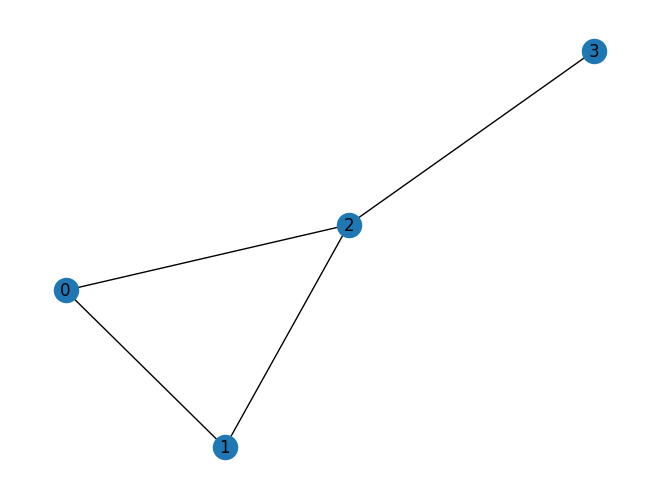

In [376]:
nx.draw(G, with_labels = True)

In [377]:
calculate_omega(A)
print(calculate_omega(A))

False


In [378]:
all_paths(A)

[[0, 1, 2, 3], [0, 2, 3]]

In [379]:
check_locking(A)

114.0 35.0
80.0 19.0
59.0 20.0
gear ratios list [[3.257142857142857], [4.2105263157894735], [2.95]]
total gear ratios [40.457142857142856]
14.0 14.0
59.0 20.0
gear ratios list [[3.257142857142857, 1.0], [4.2105263157894735, 2.95], [2.95], [], []]
total gear ratios [40.457142857142856, 2.95]


[[0, 1, 2, 3], [0, 2, 3]]